## Классификация

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import datasets, linear_model, metrics, model_selection
import numpy as np
import matplotlib.pyplot as plt

In [2]:
blobs = datasets.make_blobs(centers=2, cluster_std=5.5, random_state=1)
colors = ListedColormap(['red', 'blue'])

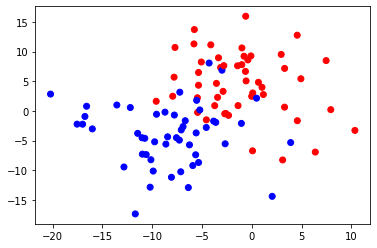

In [3]:
plt.scatter(list(map(lambda x: x[0], blobs[0])), list(map(lambda x: x[1], blobs[0])), c=blobs[1], cmap=colors)


In [4]:
train_data, test_data, train_values, test_values = model_selection.train_test_split(blobs[0], blobs[1], test_size=0.3, random_state=1)

### Линейная классификация через RidgeClassifier

In [5]:
ridge_classifier = linear_model.RidgeClassifier(random_state=1)

In [6]:
#Train classifier
ridge_classifier.fit(train_data, train_values)

RidgeClassifier(random_state=1)

### Применение RidgeClassifier

In [7]:
predict = ridge_classifier.predict(test_data)
print('REAL')
print(test_values)
print('PERDICT')
print(predict)

REAL
[0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1]
PERDICT
[0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1]


### Оценка качества модели

In [8]:
metrics.accuracy_score(test_values, predict)

0.8666666666666667

In [9]:
print('RIDGE WEIGHT:', ridge_classifier.coef_)
print('RIDGE ZERO:', ridge_classifier.intercept_)

RIDGE WEIGHT: [[-0.0854443  -0.07273219]]
RIDGE ZERO: [-0.31250723]


### LogisticRegression Логистическая регрессия

In [10]:
log_regression = linear_model.LogisticRegression(random_state=1)
log_regression.fit(train_data, train_values)
print('LogReg WEIGHT:', log_regression.coef_)
print('LogReg ZERO:', log_regression.intercept_)
predict_log = log_regression.predict(test_data)
print('PREDICT:')
print(predict_log)
print('REAL:')
print(test_values)
print('Вероятность принадлежности к классу:', log_regression.predict_proba(test_data))

LogReg WEIGHT: [[-0.42738572 -0.3117454 ]]
LogReg ZERO: [-1.27059303]
PREDICT:
[0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1]
REAL:
[0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1]
Вероятность принадлежности к классу: [[9.99254667e-01 7.45333217e-04]
 [4.08279523e-01 5.91720477e-01]
 [4.90541791e-01 5.09458209e-01]
 [3.78296027e-03 9.96217040e-01]
 [7.32221196e-01 2.67778804e-01]
 [2.44262899e-01 7.55737101e-01]
 [9.93761113e-01 6.23888724e-03]
 [9.78405579e-01 2.15944205e-02]
 [9.55344987e-01 4.46550128e-02]
 [1.68318566e-01 8.31681434e-01]
 [9.20548027e-01 7.94519726e-02]
 [8.49635842e-03 9.91503642e-01]
 [8.42172474e-01 1.57827526e-01]
 [4.78103481e-02 9.52189652e-01]
 [4.16878377e-03 9.95831216e-01]
 [7.76668489e-04 9.99223332e-01]
 [2.05937909e-01 7.94062091e-01]
 [9.31195721e-01 6.88042793e-02]
 [2.41180236e-01 7.58819764e-01]
 [8.27655095e-04 9.99172345e-01]
 [8.91142562e-02 9.10885744e-01]
 [9.95944524e-01 4.05547579e-03]
 [9.84077857e-01 1.59221428e

In [11]:
print('Accuracy RIDGE', metrics.accuracy_score(test_values, predict))
print('Accuracy LOG:', metrics.accuracy_score(test_values, predict_log))


Accuracy RIDGE 0.8666666666666667
Accuracy LOG: 0.8


### Оценка качества модели по кросс-валидации

In [12]:
ridge_cross = model_selection.cross_val_score(ridge_classifier, blobs[0], blobs[1], scoring='accuracy', cv=10)

In [13]:
log_cross = model_selection.cross_val_score(log_regression, blobs[0], blobs[1], scoring='accuracy', cv=10)

In [14]:
print('Ridge mean:{}, max:{}, min:{}, std:{}'.format(
    ridge_cross.mean(), ridge_cross.max(), ridge_cross.min(), ridge_cross.std()
))
print('Log mean:{}, max:{}, min:{}, std:{}'.format(
    log_cross.mean(), log_cross.max(), log_cross.min(), log_cross.std()
))

Ridge mean:0.8800000000000001, max:1.0, min:0.7, std:0.08717797887081348
Log mean:0.8800000000000001, max:1.0, min:0.7, std:0.08717797887081348


In [15]:
scorer = metrics.make_scorer(metrics.accuracy_score)
cv_strategy = model_selection.StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=2)
cv_strategy.split(blobs[0], blobs[1])

<generator object BaseShuffleSplit.split at 0x125394dd0>

In [16]:
ridge_scoring = model_selection.cross_val_score(ridge_classifier, blobs[0], blobs[1], scoring=scorer, cv=cv_strategy)
lr_scoring = model_selection.cross_val_score(log_regression, blobs[0], blobs[1], scoring=scorer, cv=cv_strategy)

In [17]:
print('Ridge mean:{}, max:{}, min:{}, std:{}'.format(
    ridge_scoring.mean(), ridge_scoring.max(),
    ridge_scoring.min(), ridge_scoring.std()
))
print('Log mean:{}, max:{}, min:{}, std:{}'.format(
    lr_scoring.mean(), lr_scoring.max(), lr_scoring.min(),
    lr_scoring.std()
))

Ridge mean:0.8666666666666668, max:1.0, min:0.7666666666666667, std:0.06324555320336757
Log mean:0.8666666666666668, max:1.0, min:0.7666666666666667, std:0.06666666666666665
